<a href="https://colab.research.google.com/github/goldiezhu/BIS634/blob/main/FinalProj/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install Dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.8 MB/s 


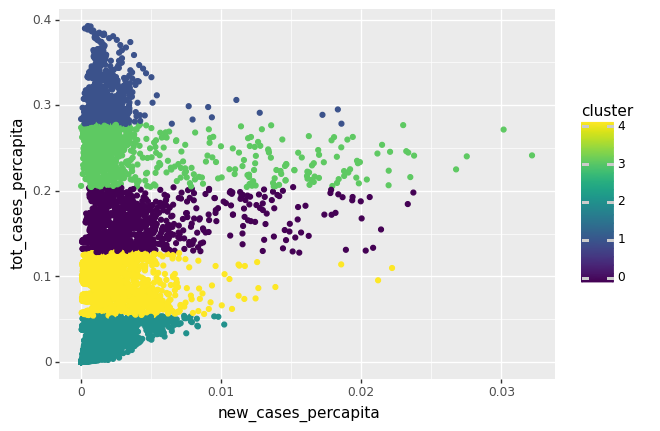

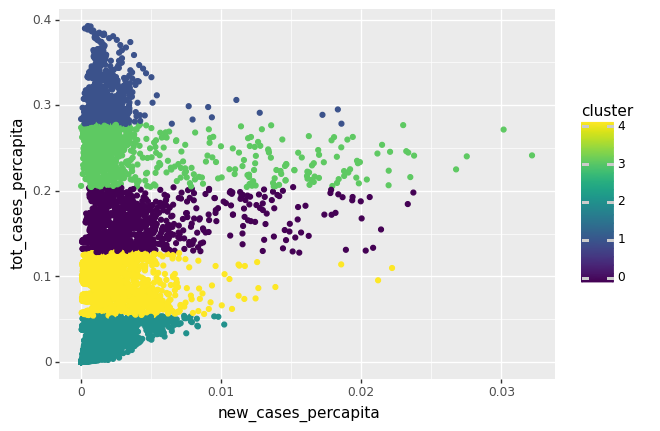

In [8]:
import dash
from dash import html, dcc
import plotly.graph_objects as go
import plotly.express as px
from dash.dependencies import Input, Output
from datetime import datetime, timedelta, date
import pandas as pd
import numpy as np
import plotly.express as px
import random
import plotnine as p9

app = dash.Dash()

df = pd.read_csv('covid_data.csv')
df_pop = pd.read_csv('population.csv')
df.drop('new_historic_deaths', inplace=True, axis=1)
df.drop('new_historic_cases', inplace=True, axis=1)
df["date_updated"] = pd.to_datetime(df["date_updated"], format="%Y-%m-%d")

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

df_pop["state"] = df_pop.NAME.map(us_state_to_abbrev)
df_pop2 = df_pop[['state','POPESTIMATE2020']]
df_pop2 = df_pop2.iloc[5: , :]
df_final = df_pop2.merge(df, on='state', how='left')

df_final["new_cases_percapita"] = df_final['new_cases'] / df_final['POPESTIMATE2020']
df_final["tot_cases_percapita"] = df_final['tot_cases'] / df_final['POPESTIMATE2020']
df_final["new_deaths_per_capita"] = df_final['new_deaths'] / df_final['POPESTIMATE2020']
df_final["tot_deaths_per_capita"] = df_final['tot_deaths'] / df_final['POPESTIMATE2020']


k=5
pts = [np.array(pt) for pt in zip(df_final['new_cases_percapita'], df_final['tot_cases_percapita'])]
centers = random.sample(pts, k)
old_cluster_ids, cluster_ids = None, [] 
while cluster_ids != old_cluster_ids:
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = np.linalg.norm(pt - center)
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    df_final['cluster'] = cluster_ids
    cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
        for match in range(k)]
    centers = [sum(pts)/len(pts) for pts in cluster_pts]
(p9.ggplot(df_final, p9.aes(x="new_cases_percapita", y="tot_cases_percapita", color="cluster")) 
    + p9.geom_point()).draw()





In [10]:
df1 = pd.read_csv('covid_data.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_updated         9120 non-null   object
 1   state                9120 non-null   object
 2   start_date           9120 non-null   object
 3   end_date             9120 non-null   object
 4   tot_cases            9120 non-null   int64 
 5   new_cases            9120 non-null   int64 
 6   tot_deaths           9120 non-null   int64 
 7   new_deaths           9120 non-null   int64 
 8   new_historic_cases   9120 non-null   int64 
 9   new_historic_deaths  9120 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 712.6+ KB


In [6]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SUMLEV                 57 non-null     int64  
 1   REGION                 57 non-null     object 
 2   DIVISION               57 non-null     object 
 3   STATE                  57 non-null     int64  
 4   NAME                   57 non-null     object 
 5   ESTIMATESBASE2020      57 non-null     int64  
 6   POPESTIMATE2020        57 non-null     int64  
 7   POPESTIMATE2021        57 non-null     int64  
 8   NPOPCHG_2020           57 non-null     int64  
 9   NPOPCHG_2021           57 non-null     int64  
 10  BIRTHS2020             57 non-null     int64  
 11  BIRTHS2021             57 non-null     int64  
 12  DEATHS2020             57 non-null     int64  
 13  DEATHS2021             57 non-null     int64  
 14  NATURALINC2020         57 non-null     int64  
 15  NATURALI

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7904 entries, 0 to 7903
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   state                  7904 non-null   object        
 1   POPESTIMATE2020        7904 non-null   int64         
 2   date_updated           7904 non-null   datetime64[ns]
 3   start_date             7904 non-null   object        
 4   end_date               7904 non-null   object        
 5   tot_cases              7904 non-null   int64         
 6   new_cases              7904 non-null   int64         
 7   tot_deaths             7904 non-null   int64         
 8   new_deaths             7904 non-null   int64         
 9   new_cases_percapita    7904 non-null   float64       
 10  tot_cases_percapita    7904 non-null   float64       
 11  new_deaths_per_capita  7904 non-null   float64       
 12  tot_deaths_per_capita  7904 non-null   float64       
 13  clu

In [11]:
df_final.mean(axis=0)

<ipython-input-11-3898f49cd38a>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
<ipython-input-11-3898f49cd38a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


POPESTIMATE2020          6.438127e+06
tot_cases                7.957718e+05
new_cases                1.220761e+04
tot_deaths               1.068457e+04
new_deaths               1.319603e+02
new_cases_percapita      1.945975e-03
tot_cases_percapita      1.263840e-01
new_deaths_per_capita    2.026227e-05
tot_deaths_per_capita    1.624383e-03
cluster                  2.273279e+00
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


[Text(0.5, 1.0, 'Distribution of New Cases')]

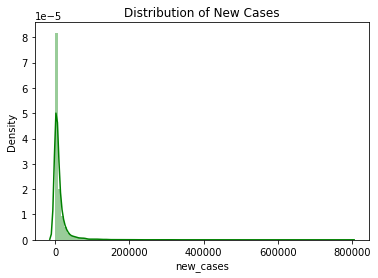

In [22]:
import seaborn as sns
sns.distplot(df_final['new_cases'], color='g', bins=100, hist_kws={'alpha': 0.4}).set(title='Distribution of New Cases')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


[Text(0.5, 1.0, 'Distribution of New Deaths')]

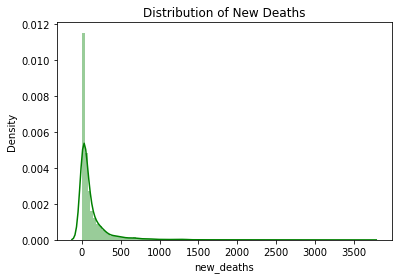

In [21]:
import seaborn as sns
sns.distplot(df_final['new_deaths'], color='g', bins=100, hist_kws={'alpha': 0.4}).set(title='Distribution of New Deaths')

In [ ]:
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

features = ['new_cases','tot_cases','tot_deaths','new_deaths']

x = df.loc[:, features].values
y = df.loc[:,['state']].values
x = StandardScaler().fit_transform(x)



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 0','principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['state']]], axis = 1)

In [ ]:
finalDf

,principal_component_0,principal_component_1,principal_component_2,state
0,-1.043178,0.007178,0.105559,AK
1,-1.043178,0.007178,0.105559,AK
2,-1.043178,0.007178,0.105559,AK
3,-1.043178,0.007178,0.105559,AK
4,-1.043178,0.007178,0.105559,AK
...,...,...,...,...
9115,-0.871759,-0.078166,0.076956,WY
9116,-0.869635,-0.076978,0.079585,WY
9117,-0.870583,-0.078741,0.077057,WY
9118,-0.876462,-0.093191,0.101318,WY


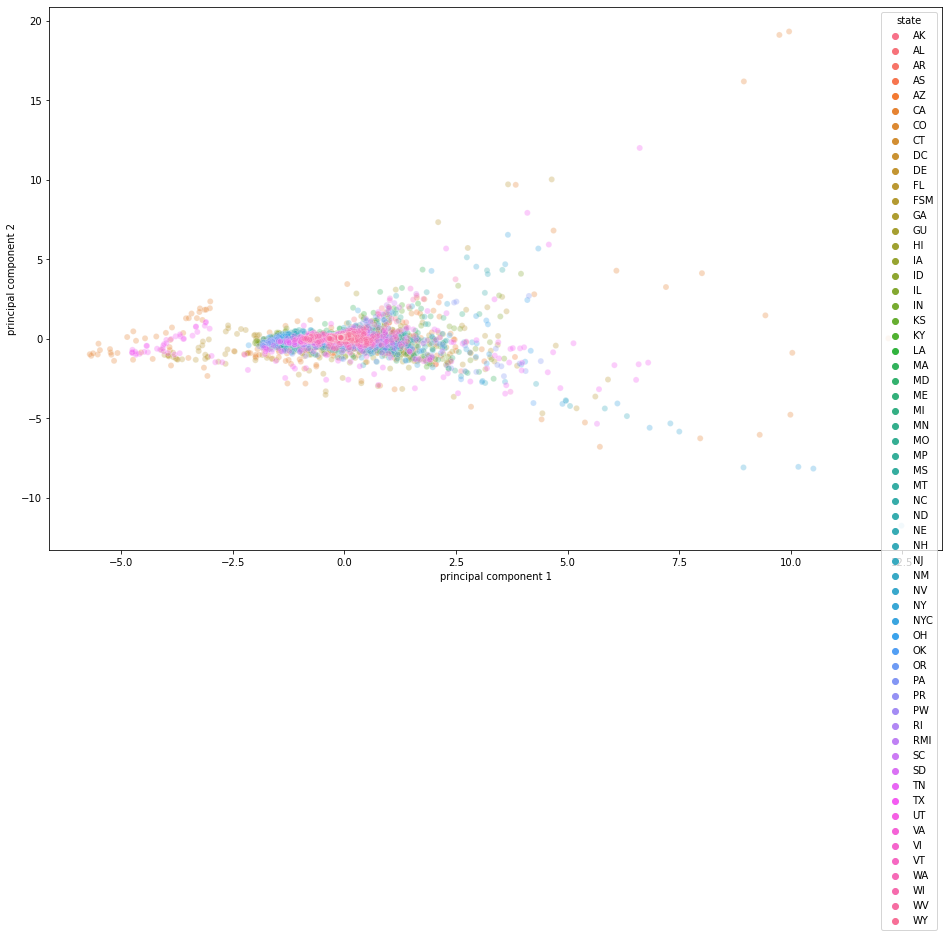

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 1', y='principal component 2',
    hue="state",
    data=finalDf,
    legend="full",
    alpha=0.3
)

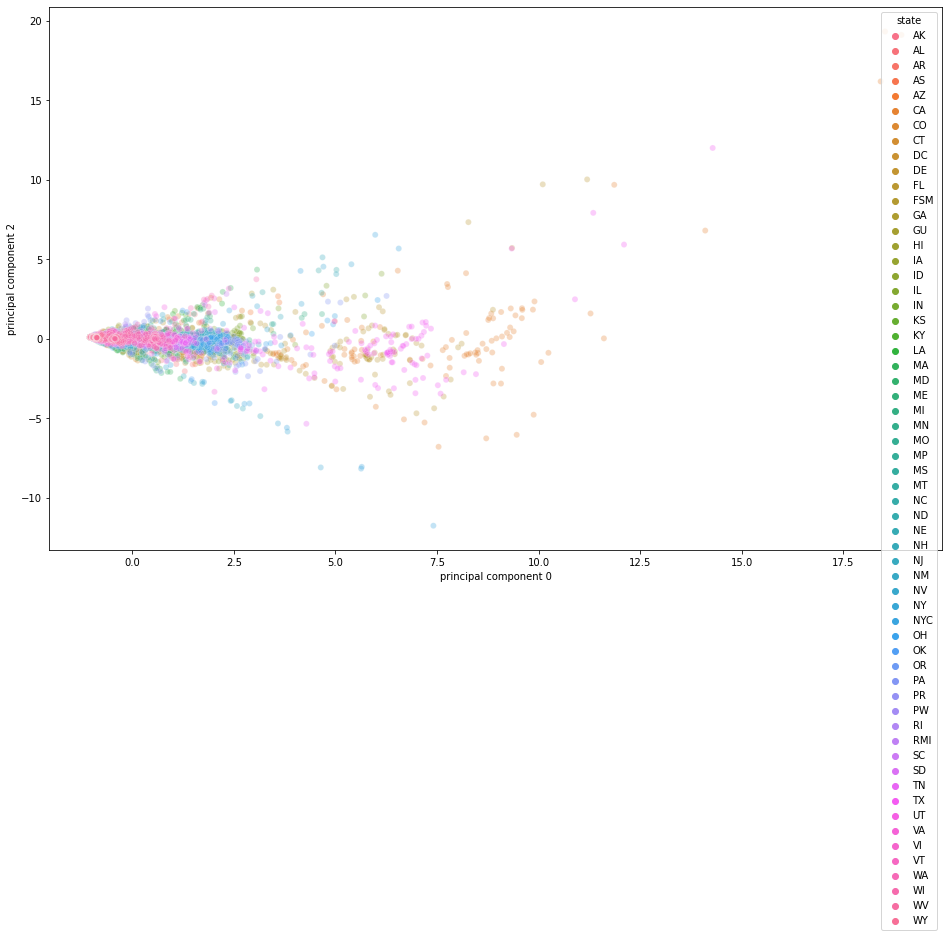

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 0', y='principal component 2',
    hue="state",
    data=finalDf,
    legend="full",
    alpha=0.3
)

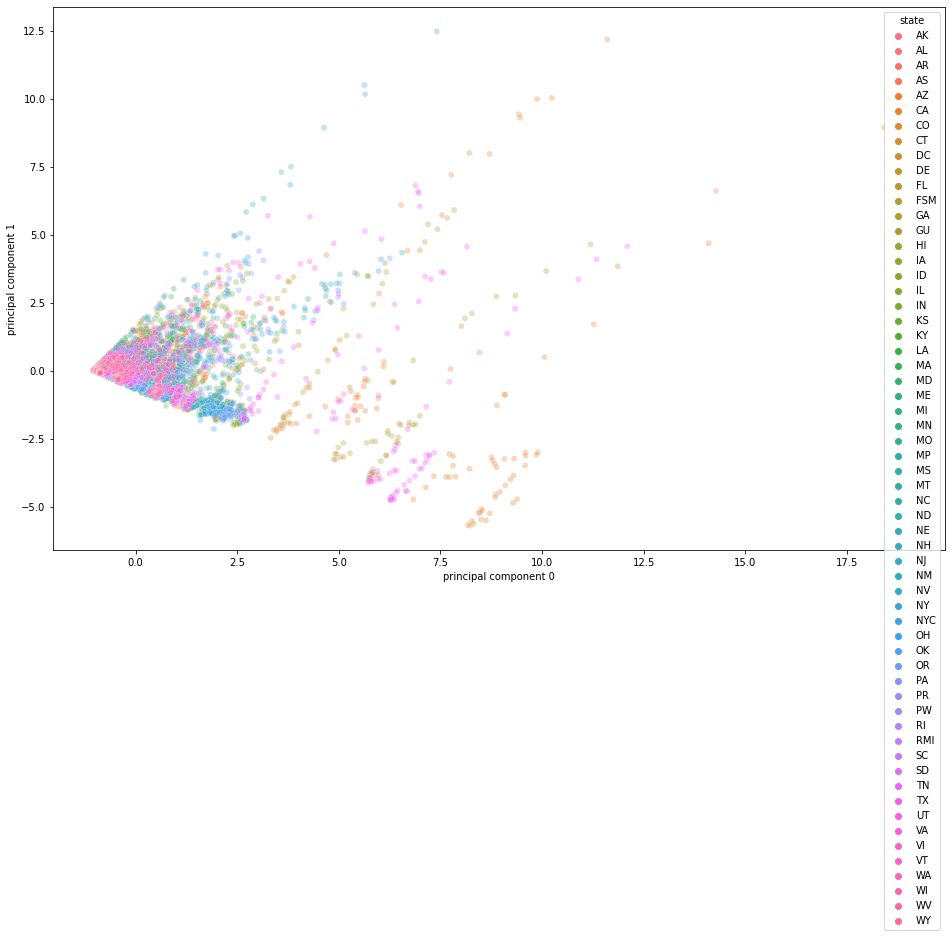

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 0', y='principal component 1',
    hue="state",
    data=finalDf,
    legend="full",
    alpha=0.3
)